## NOTEBOOK IMPORTS

In [130]:
## DATA ANALYSIS
import numpy as np
import pandas as pd

## DATA VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns

## DATA PREPROCESSING
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

## MODEL AND EVALUATION
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error


from sklearn.linear_model import LinearRegression

## LOAD DATA

In [100]:
data = pd.read_csv('AMES_Final_DF.csv')

In [101]:
with open('Ames_Housing_Feature_Description.txt') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [102]:
data.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Columns: 274 entries, Lot Frontage to Sale Condition_Partial
dtypes: float64(11), int64(263)
memory usage: 6.1 MB


## SEPARATE DATA INTO X FEATURES AND y LABELS

In [104]:
X = data.drop('SalePrice', axis=1)

In [105]:
y = data['SalePrice']

## SPLIT DATA INTO TRAINING SET ANS TEST SET
### Test Proportion: 10%
### Random State: 101

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101, test_size=.10)

## Scale X Features for optimal Regression Performance

In [107]:
scaler = StandardScaler()

In [108]:
scaler.fit(X_train)

StandardScaler()

In [109]:
X_train = scaler.transform(X_train)

In [110]:
X_test = scaler.transform(X_test)

## USING ELASTIC NET MODEL

In [115]:
elastic_model = ElasticNetCV(alphas=[0.1, 1, 5, 10, 50, 100], max_iter=1000000)

In [116]:
grid_params = {'l1_ratio': [.1, .5, .7, .9, .95, .99, 1]}

## GridSearchCV Model

In [117]:
grid_model = GridSearchCV(estimator=elastic_model, param_grid=grid_params, 
                          scoring='neg_mean_squared_error', cv=5, verbose=2)

In [118]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END .......................................l1_ratio=0.1; total time=   1.2s
[CV] END .......................................l1_ratio=0.1; total time=   1.1s
[CV] END .......................................l1_ratio=0.1; total time=   1.0s
[CV] END .......................................l1_ratio=0.1; total time=   0.9s
[CV] END .......................................l1_ratio=0.1; total time=   1.0s
[CV] END .......................................l1_ratio=0.5; total time=   1.3s
[CV] END .......................................l1_ratio=0.5; total time=   1.3s
[CV] END .......................................l1_ratio=0.5; total time=   1.2s
[CV] END .......................................l1_ratio=0.5; total time=   1.2s
[CV] END .......................................l1_ratio=0.5; total time=   1.2s
[CV] END .......................................l1_ratio=0.7; total time=   1.4s
[CV] END .......................................l

GridSearchCV(cv=5,
             estimator=ElasticNetCV(alphas=[0.1, 1, 5, 10, 50, 100],
                                    max_iter=1000000),
             param_grid={'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

## BEST PARAMETER ESTIMATORS OF MODEL

In [120]:
grid_model.best_estimator_

ElasticNetCV(alphas=[0.1, 1, 5, 10, 50, 100], l1_ratio=1, max_iter=1000000)

In [122]:
grid_model.best_params_

{'l1_ratio': 1}

## EVALUATE MODEL PERFORMACE 

In [126]:
y_pred = grid_model.predict(X_test)

In [128]:
MAE = mean_absolute_error(y_test, y_pred)
MAE

14195.354900562173

In [129]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

20558.508566893164

In [183]:
#Xs = np.array([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0], dtype='float64')
Xs = np.array([0.0, 2, 3, 5, 6, 7, 9]).reshape(7, 1)

In [184]:
Ys =   

In [185]:
regr = LinearRegression()

In [188]:
regr.fit(Xs, Ys)

LinearRegression()

In [190]:
regr.predict([[7]])

array([[4.]])

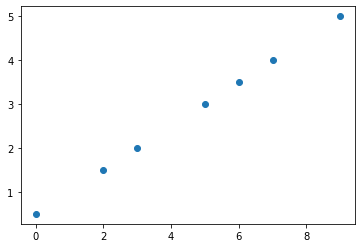

In [176]:
plt.scatter(Xs, Ys)
plt.show()